<a href="https://colab.research.google.com/github/Bhargavisp852/LGMVIP_DataScience/blob/main/Beginner_Level/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRINCIPAL COMPONENT ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Loading the Iris Dataset

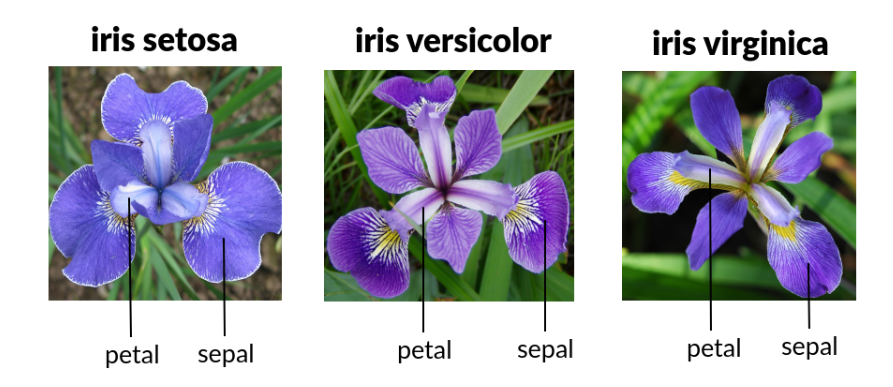

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
df.dropna(how="all", inplace=True)
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


## Inputs and Targets

In [ ]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [ ]:
print(X.shape, y.shape)

(149, 4) (149,)


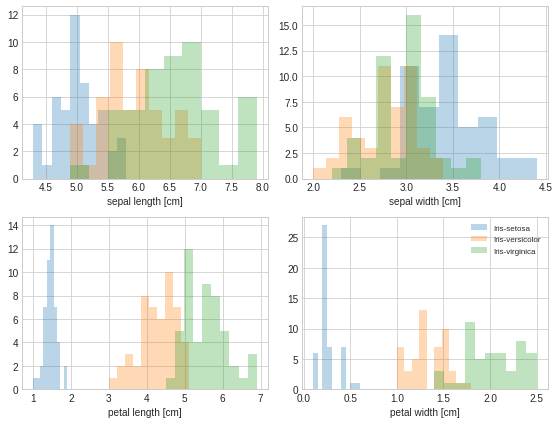

In [ ]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [ ]:
X_std

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ],
       [-1.51163569,  0.8077768 , -1.35396443, -1.19326436],
       [-1.02726211,  0.8077768 , -1.29694332, -1.32506301],
       [-1.75382249, -0.34951881, -1.35396443, -1.32506301],
       [-1.1483555 ,  0.11339944, -1.29694332, -1.45686167],
       [-0.54288852,  1.50215416, -1.29694332, -1.32506301],
       [-1.2694489 ,  0.8077768 , -1.23992221, -1.32506301],
       [-1.2694489 , -0.11805969, -1.35396443, -1.45686167],
       [-1.87491588, -0.11805969, -1.52502777, -1.45686167],
       [-0.05851493,  2.19653152, -1.46800666, -1.32506301],
       [-0.17960833,  3.122368  , -1.29694332, -1.0614657 ],
       [-0.54288852,  1.9650724 , -1.41098555, -1.0614657 ],
       [-0.90616871,  1.

## Covariance Matrix

In [ ]:
cov_matrix = np.cov(X_std.T)

In [ ]:
print(f"Covariance Matrix\n{cov_matrix}")

Covariance Matrix
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


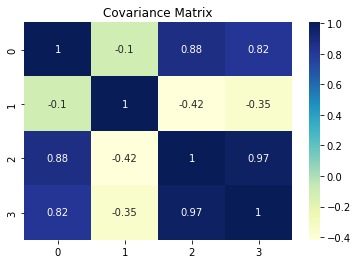

In [ ]:
import seaborn as sb

dplot = sb.heatmap(cov_matrix, cmap="YlGnBu", annot=True)
dplot.set_title("Covariance Matrix")
plt.show()

## Eigen Decomposition

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [ ]:
print(f"Eigenvectors\n{eig_vecs}")
print(f"\nEigenvalues\n{eig_vals}")

Eigenvectors
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

Eigenvalues
[2.92442837 0.93215233 0.14946373 0.02098259]


## Selecting Principal Components

In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [ ]:
eig_pairs

[(2.9244283691111117,
  array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])),
 (0.9321523302535063,
  array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])),
 (0.14946373489813355,
  array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])),
 (0.020982592764270655,
  array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]

In [ ]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [ ]:
print("Eigenvalues in descending order:")
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9244283691111117
0.9321523302535063
0.14946373489813355
0.020982592764270655


In [ ]:
eig_pairs

[(2.9244283691111117,
  array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])),
 (0.9321523302535063,
  array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])),
 (0.14946373489813355,
  array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])),
 (0.020982592764270655,
  array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]

## Explained Variance

In [ ]:
tot = sum(eig_vals)
tot

4.027027027027022

In [ ]:
var_exp = [(i/tot) * 100 for i in sorted(eig_vals, reverse=True)]
var_exp

[72.62003332692032, 23.147406858644146, 3.7115155645845292, 0.5210442498510169]

In [ ]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

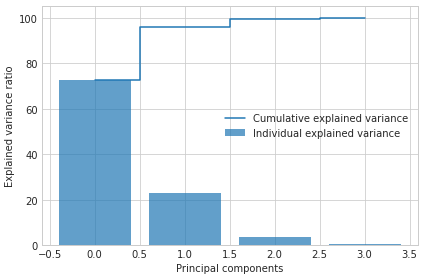

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.7, align='center',
            label='Individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Projection Matrix

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Principal Component Matrix:\n', matrix_w)

Principal Component Matrix:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [ ]:
Y = X_std.dot(matrix_w)

In [ ]:
print(X_std.shape, matrix_w.shape)

(149, 4) (4, 2)


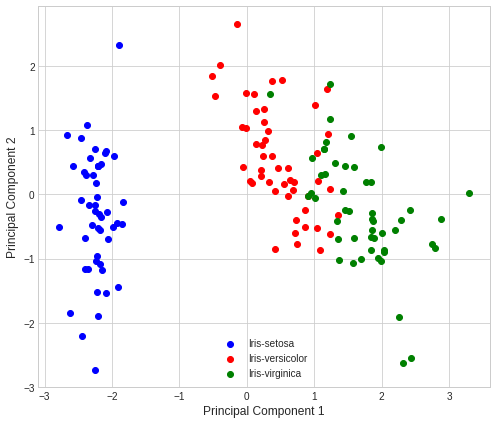

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7, 6))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()